# Analisis Variabel - Variabel yang Mempengaruhi Banyaknya Sepeda Sewaan

###### Proses penyewaan sepeda-berbagi sangat berkorelasi dengan pengaturan lingkungan dan musiman. Misalnya, kondisi cuaca, curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat memengaruhi perilaku sewaan. Set data inti terkait dengan log historis dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., AS

## Eksplorasi Data

###### Data yang akan dianalisis adalah dataset Bike Sharing yang diambil dari https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset. Data set ini memiliki beberapa atribut diantaranya:

###### 1. Instant : Rekam indeks

###### 2. dteday : menunjukkan tanggal

###### 3. season : menunjukkan musim yang terdiri dari empat musim (1:spring; 2.summer; 3.fall; 4.winter)

###### 4. yr : menunjukkan tahun (0:2011; 1:2012)

###### 5. mnth : menunjukkan bulan ( 1 sampai 12)

###### 6. hr : menunjukkan waktu (0 - 23)

###### 7. weekday : Hari dalam seminggu

###### 8. workingday : jika hari bukan akhir pekan atau hari libur adalah 1, sebaliknya adalah 0.

###### 9. weathersit: 1: Jelas, Sedikit awan, Berawan sebagian, Berawan sebagian; 2: Kabut + Berawan, Kabut + Rusak awan, Kabut + Beberapa awan, Kabut; 3: Salju Ringan, Hujan Ringan + Badai + Awan Tersebar, Hujan Ringan + Awan Terserak; 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

###### 10. temp: Suhu normal dalam Celcius

###### 11. atemp: Suhu perasaan dalam Celcius

###### 12. hum: Kelembaban

###### 13. windspeed: Kecepatan angin

###### 14. Casual: jumlah pengguna biasa

###### 15. registered: jumlah pengguna terdaftar

###### 16. cnt: jumlah total sepeda sewaan termasuk kasual dan terdaftar

### Memanggil data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../digitalent2/"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'Advanced Linear Regression With statsmodels.ipynb', 'api-ms-win-core-console-l1-1-0.dll', 'api-ms-win-core-datetime-l1-1-0.dll', 'api-ms-win-core-debug-l1-1-0.dll', 'api-ms-win-core-errorhandling-l1-1-0.dll', 'api-ms-win-core-file-l1-1-0.dll', 'api-ms-win-core-file-l1-2-0.dll', 'api-ms-win-core-file-l2-1-0.dll', 'api-ms-win-core-handle-l1-1-0.dll', 'api-ms-win-core-heap-l1-1-0.dll', 'api-ms-win-core-interlocked-l1-1-0.dll', 'api-ms-win-core-libraryloader-l1-1-0.dll', 'api-ms-win-core-localization-l1-2-0.dll', 'api-ms-win-core-memory-l1-1-0.dll', 'api-ms-win-core-namedpipe-l1-1-0.dll', 'api-ms-win-core-processenvironment-l1-1-0.dll', 'api-ms-win-core-processthreads-l1-1-0.dll', 'api-ms-win-core-processthreads-l1-1-1.dll', 'api-ms-win-core-profile-l1-1-0.dll', 'api-ms-win-core-rtlsupport-l1-1-0.dll', 'api-ms-win-core-string-l1-1-0.dll', 'api-ms-win-core-synch-l1-1-0.dll', 'api-ms-win-core-synch-l1-2-0.dll', 'api-ms-win-core-sysinfo-l1-1-0.dll', 'api-ms-win-core-ti

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
day_df=pd.read_csv('day.csv')

In [4]:
hour_df=pd.read_csv('hour.csv')

### Memeriksa Data

In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Memeriksa tipe data

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Statistika Deskriptif

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Visualisasi Data

#### Jumlah sepeda yang disewa pengguna "casual" per musim

Text(0.5, 1.0, 'Number of bikes rented per season')

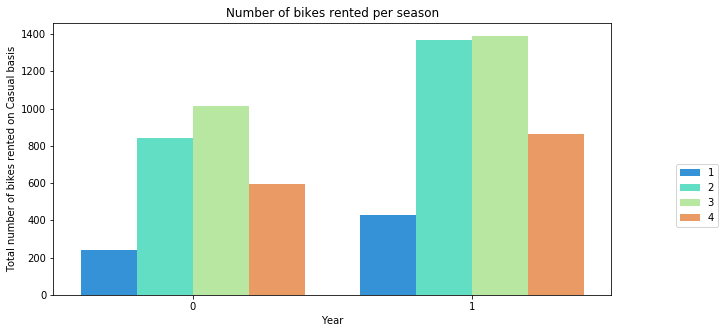

In [12]:
plt.figure(figsize=(10,5))
sns.barplot('yr','casual',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

#### Jumlah sepeda yang disewa pengguna "registered" per musim

Text(0.5, 1.0, 'Number of bikes rented per season')

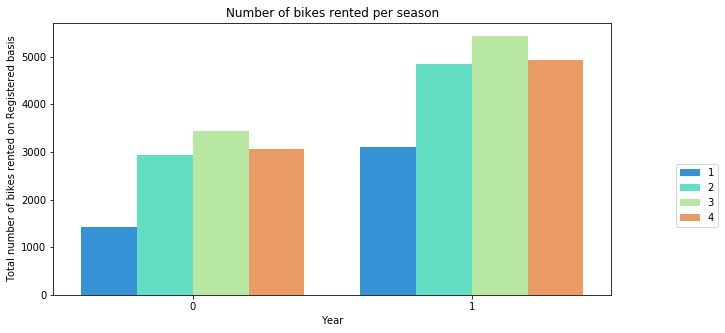

In [13]:
plt.figure(figsize=(10,5))
sns.barplot('yr','registered',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

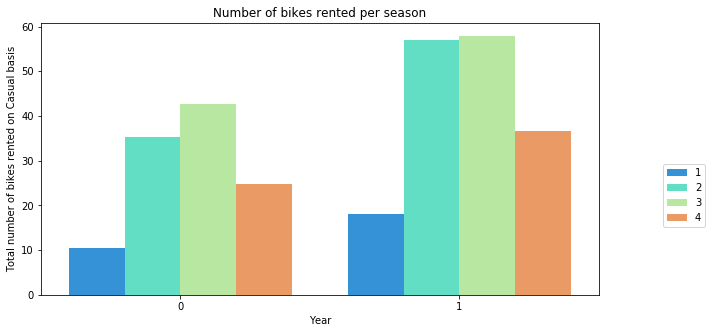

In [14]:
plt.figure(figsize=(10,5))
sns.barplot('yr','casual',hue='season', data=hour_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

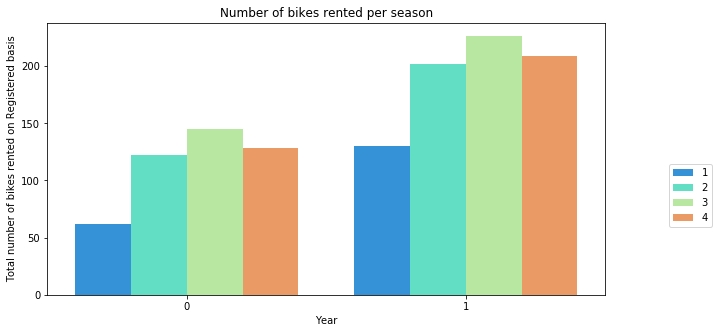

In [15]:
plt.figure(figsize=(10,5))
sns.barplot('yr','registered',hue='season', data=hour_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

In [16]:
df_season_fall=day_df[day_df['season']==3]

In [17]:
df_season_fall.mnth.nunique()

4

#### Pengaruh "workingday" pada jumlah sepeda sewaan per bulan

E:\digitalent2\EDA\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


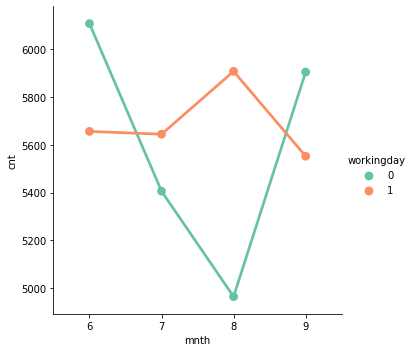

In [18]:
sns.factorplot('mnth','cnt',hue='workingday',data=df_season_fall, ci=None, palette='Set2')

### Melihat hubungan variabel bebas dengan variabel terikat menggunakan scatter plot untuk data day

#### 1. Count(Y) vs dteday(X1)

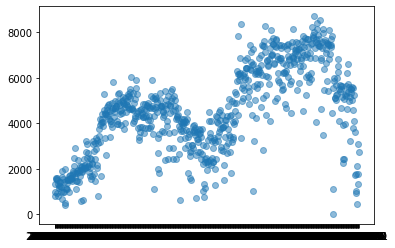

In [19]:
plt.scatter(x = day_df['dteday'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 2. Count(Y) vs season(X2)

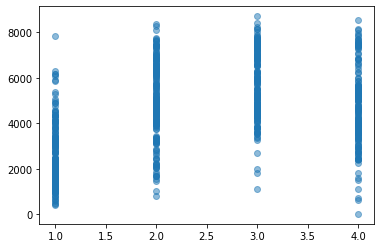

In [20]:
plt.scatter(x = day_df['season'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 3. Count(Y) vs year(X3)

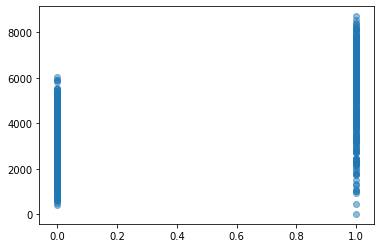

In [21]:
plt.scatter(x = day_df['yr'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 4. Count(Y) vs month(X4)

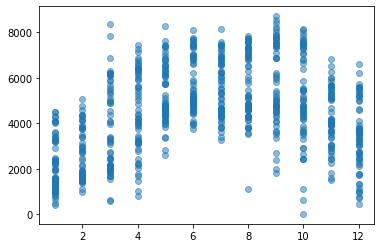

In [22]:
plt.scatter(x = day_df['mnth'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 5. Count(Y) vs holiday(X5)

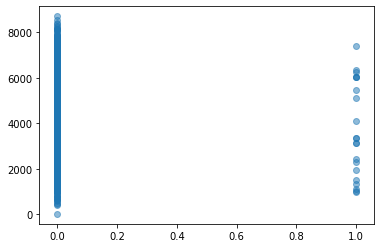

In [23]:
plt.scatter(x = day_df['holiday'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 6. Count(Y) vs weekday(X6)

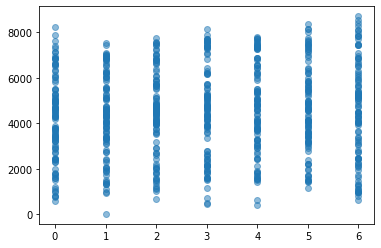

In [24]:
plt.scatter(x = day_df['weekday'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 7. Count(Y) vs workingday(X7)

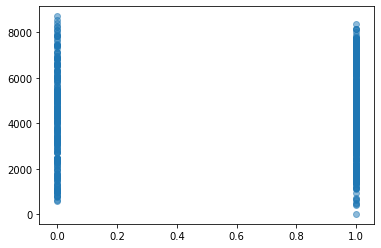

In [25]:
plt.scatter(x = day_df['workingday'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 8. Count(Y) vs weathersit(X8)

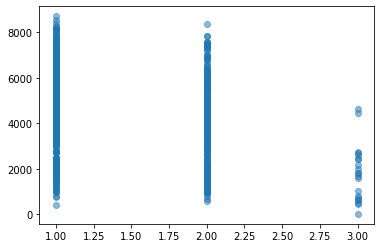

In [26]:
plt.scatter(x = day_df['weathersit'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 9. Count(Y) vs temp(X9)

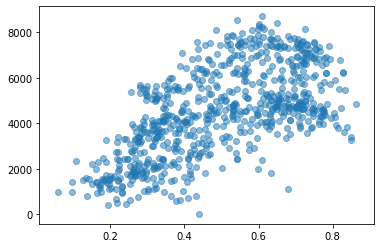

In [27]:
plt.scatter(x = day_df['temp'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas ada kecenderungan korelasi positif bila X9 naik, Y cenderung naik tapi mungkin ada faktor lain yang berpengaruh

#### 10. Count(Y) vs atemp(X10)

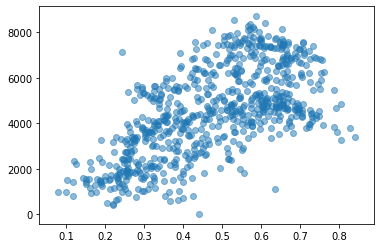

In [28]:
plt.scatter(x = day_df['atemp'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas ada kecenderungan korelasi positif bila X10 naik, Y cenderung naik tapi mungkin ada faktor lain yang berpengaruh

#### 11. Count(Y) vs hum(X11)

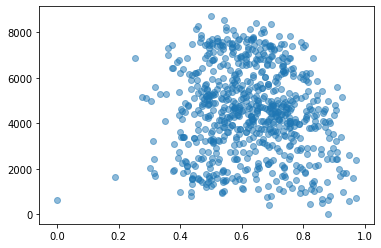

In [29]:
plt.scatter(x = day_df['hum'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 12. Count(Y) vs windspeed(X12)

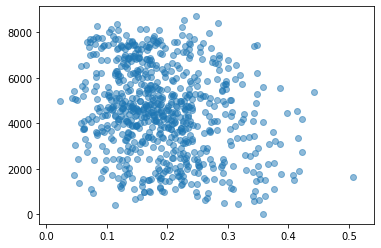

In [30]:
plt.scatter(x = day_df['windspeed'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 13. Count(Y) vs casual(X13)

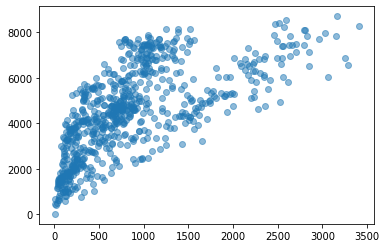

In [31]:
plt.scatter(x = day_df['casual'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas ada kecenderungan korelasi positif bila X13 naik, Y cenderung naik tapi mungkin ada faktor lain yang berpengaruh

#### 14. Count(Y) vs registered(X14)

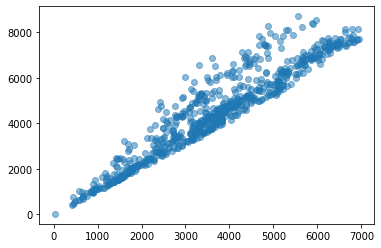

In [32]:
plt.scatter(x = day_df['registered'], y = day_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas terlihat adanya korelasi positif. Y akan naik bila X14 naik, bila X14 dikendalikan maka Y juga akan terkendali

###### Dari semua hasil scatter plot tidak semua variabel menunjukkan adanya korelasi, hanya variabel temp, atemp, casual, dan registered yang menunjukkan adanya kemungkinan berkorelasi dengan variabel terikat count(Y)

### Melihat hubungan variabel bebas dengan variabel terikat menggunakan heatmap untuk data day

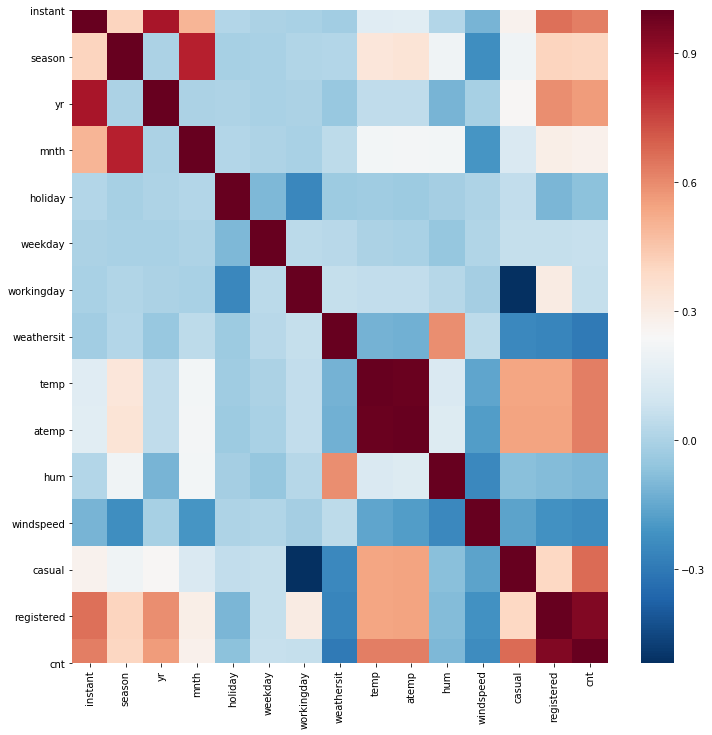

In [33]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(day_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(day_df.corr(),cmap='RdBu_r')

### Melihat hubungan variabel bebas dengan variabel terikat menggunakan scatter plot untuk data hour

#### 1. Count(Y) vs dteday(X1)

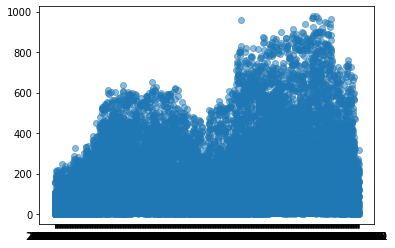

In [34]:
plt.scatter(x = hour_df['dteday'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 2. Count(Y) vs season(X2)

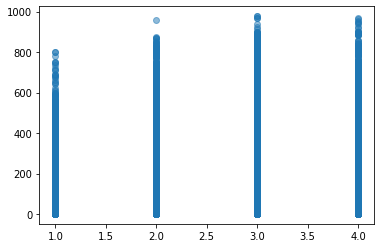

In [35]:
plt.scatter(x = hour_df['season'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 3. Count(Y) vs year(X3)

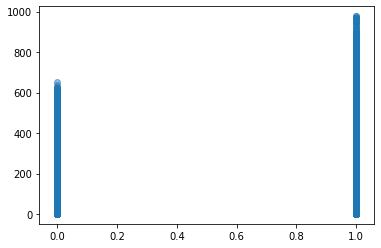

In [36]:
plt.scatter(x = hour_df['yr'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 4. Count(Y) vs month(X4)

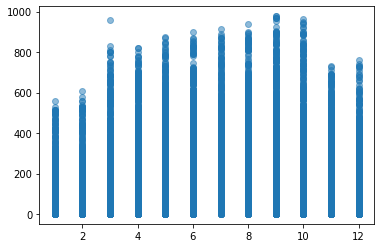

In [37]:
plt.scatter(x = hour_df['mnth'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 5. Count(Y) vs hour(X5)

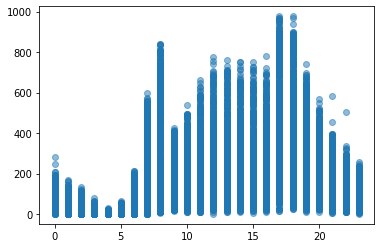

In [38]:
plt.scatter(x = hour_df['hr'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 6. Count(Y) vs holiday(X6)

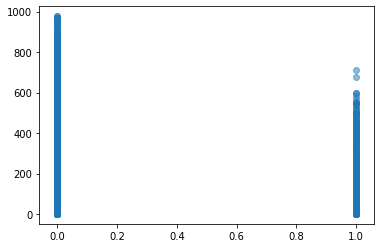

In [39]:
plt.scatter(x = hour_df['holiday'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 7. Count(Y) vs weekday(X7)

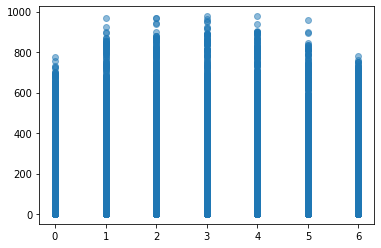

In [40]:
plt.scatter(x = hour_df['weekday'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 8. Count(Y) vs workingday(X8)

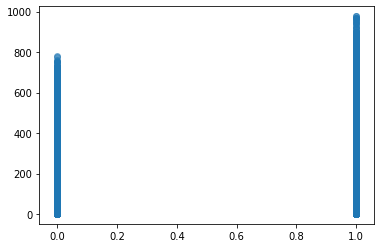

In [41]:
plt.scatter(x = hour_df['workingday'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 9. Count(Y) vs weathersit(X9)

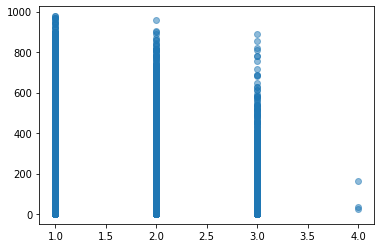

In [42]:
plt.scatter(x = hour_df['weathersit'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 10. Count(Y) vs temp(X10)

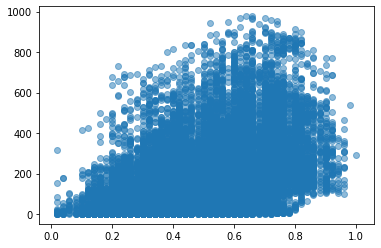

In [43]:
plt.scatter(x = hour_df['temp'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 11. Count(Y) vs atemp(X11)

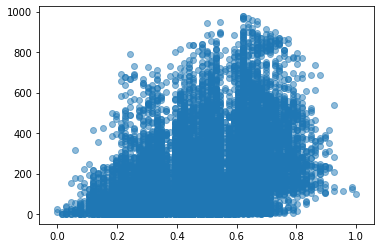

In [44]:
plt.scatter(x = hour_df['atemp'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 12. Count(Y) vs hum(X12)

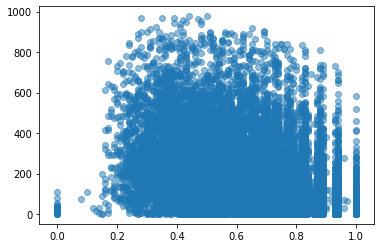

In [45]:
plt.scatter(x = hour_df['hum'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 13. Count(Y) vs windspeed(X13)

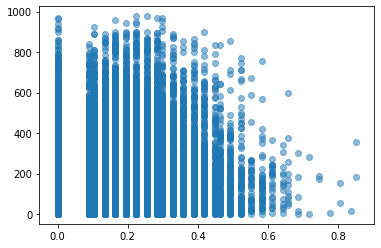

In [46]:
plt.scatter(x = hour_df['windspeed'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas tidak nampak adanya suatu korelasi

#### 14. Count(Y) vs casual(X14)

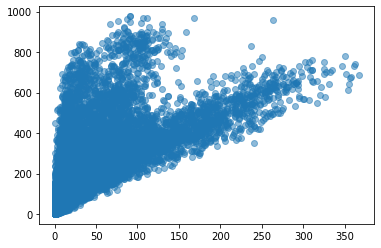

In [47]:
plt.scatter(x = hour_df['casual'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas ada kecenderungan korelasi positif bila X14 naik, Y cenderung naik tapi mungkin ada faktor lain yang berpengaruh

#### 15. Count(Y) vs registered(X15)

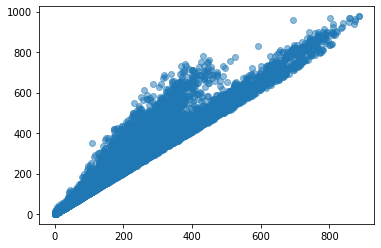

In [48]:
plt.scatter(x = hour_df['registered'], y = hour_df['cnt'], alpha= .5)
plt.show()

###### Berdasarkan scatter plot diatas terlihat adanya korelasi positif. Y akan naik bila X15 naik, bila X15 dikendalikan maka Y juga akan terkendali

### Melihat hubungan variabel bebas dengan variabel terikat menggunakan heatmap untuk data hour

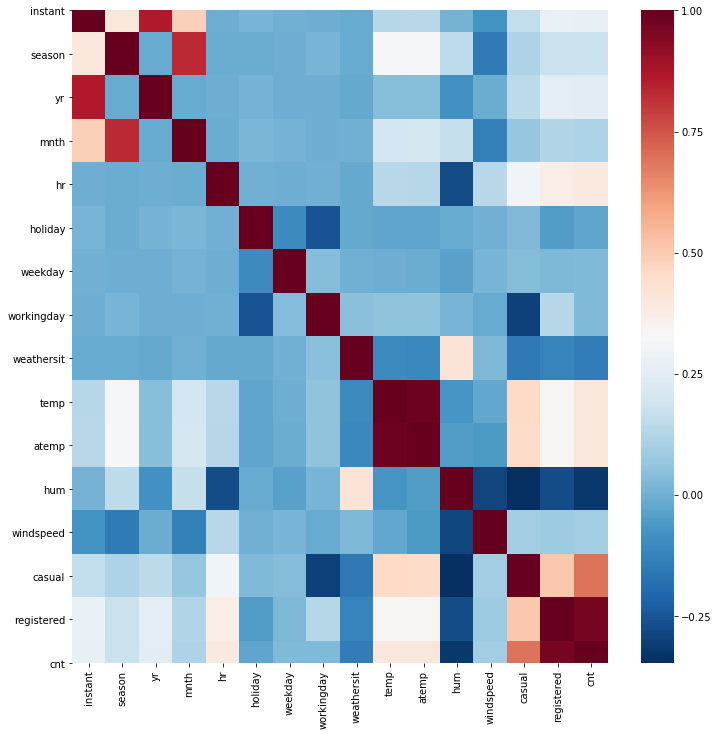

In [49]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(hour_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hour_df.corr(),cmap='RdBu_r')

In [50]:
df=pd.merge(day_df,hour_df,how='left',left_on='dteday',right_on='dteday')

In [51]:
X=df.drop(['dteday','cnt_y'],axis=1)
y=df['cnt_y']

In [58]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [64]:
r2_scores = metrics.r2_score(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)

fig,ax = plt.subplots()
ax.plot(range(0,10),
        r2_scores)
ax.set_xlabel('Iteration')
ax.set_ylabel('R.Squared')
ax.set_title('Cross-Validation scores')
plt.show()


print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse))

NameError: name 'y_test' is not defined

In [ ]:
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R2-score: %.2f" % r2_score(y_test, y_test))

In [ ]:
print('R sq:  ',lm.score(X_train,y_train))

In [ ]:
pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])

###### Dari hasil diatas didapatkan model regresi untuk data day yaitu Jumlah sepeda sewaan = 2.777166e-06 season - 1.536784e-05 year - 1.348958e-04 month + 3.959008e-06 holiday + 4.006879e-07 weekday + 2.854024e-07 workingday - 5.604291e-14 weathersit + 5.709389e-13 temperatur + 3.702948e-13 atemp - 5.495582e-14 humidity - 1.454743e-14 windspeed + 6.549659e-03 casual + 6.549659e-03 registered yang artinya:

###### 1. Nilai Koefisien regresi variabel season sebesar 2.777166e-06 menyatakan bahwa apabila variabel season mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar 2.777166e-06 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor season dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh season belum tentu meningkatkan jumlah sepeda sewaan

###### 2. Nilai Koefisien regresi variabel year  sebesar -1.536784e-05 menyatakan bahwa apabila variabel year mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar -1.536784e-05 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor year dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh year belum tentu meningkatkan jumlah sepeda sewaan

###### 3. Nilai Koefisien regresi variabel month  sebesar -1.348958e-04 menyatakan bahwa apabila variabel month mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar -1.348958e-04 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor month dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh month belum tentu meningkatkan jumlah sepeda sewaan

###### 4. Nilai Koefisien regresi variabel holiday sebesar 3.959008e-06 menyatakan bahwa apabila variabel holiday mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar 3.959008e-06 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor holiday dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh holiday belum tentu meningkatkan jumlah sepeda sewaan

###### 5. Nilai Koefisien regresi variabel weekday sebesar 4.006879e-07 menyatakan bahwa apabila variabel weekday mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar 4.006879e-07 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor weekday dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh weekday belum tentu meningkatkan jumlah sepeda sewaan

###### 6. Nilai Koefisien regresi variabel workingday sebesar 2.854024e-07 menyatakan bahwa apabila variabel workingday mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar 2.854024e-07 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor workingday dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh workingday belum tentu meningkatkan jumlah sepeda sewaan

###### 7. Nilai Koefisien regresi variabel weathersit  sebesar - 5.604291e-14 menyatakan bahwa apabila variabel weathersit mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar - 5.604291e-14 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor weathersit dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh weathersit belum tentu meningkatkan jumlah sepeda sewaan

###### 8. Nilai Koefisien regresi variabel temperatur sebesar 5.709389e-13 menyatakan bahwa apabila variabel temperatur mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar 5.709389e-13 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.

###### 9. Nilai Koefisien regresi variabel atemp sebesar 3.702948e-13 menyatakan bahwa apabila variabel atemp mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar 3.702948e-13 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.

###### 10. Nilai Koefisien regresi variabel humidity sebesar -5.495582e-14 menyatakan bahwa apabila variabel humidity mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar -5.495582e-14 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor humidity dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh humidity belum tentu meningkatkan jumlah sepeda sewaan

###### 11. Nilai Koefisien regresi variabel windspeed sebesar -1.454743e-14 menyatakan bahwa apabila variabel windspeed mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar -1.454743e-14 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. Faktor windspeed dalam penelitian ini merupakan faktor yang tidak berpengaruh terhadap jumlah sepeda sewaan. Hasil ini menjelaskan bahwa peningkatan pengaruh windspeed belum tentu meningkatkan jumlah sepeda sewaan

###### 12. Nilai Koefisien regresi variabel casual sebesar 6.549659e-03 menyatakan bahwa apabila variabel casual mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar 6.549659e-03 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.

###### 13. Nilai Koefisien regresi variabel registered sebesar 6.549659e-03 menyatakan bahwa apabila variabel registered mengalami peningkatan sebesar 1 satuan maka akan meningkatkan jumlah sepeda sewaan sebesar 6.549659e-03 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.